# UAC Audio Class Devices Scan and Profile

In [1]:
import os, sys

def gen_relative_path(target_path): 
    
    def del_same_parents(target_path, current_path):
        if target_path[0] == current_path[0]:
            target_path.pop(0)
            current_path.pop(0)
            del_same_parents(target_path, current_path)
            
    current_path = os.getcwd().replace('\\', '/').split('/')
    target_path = target_path.replace('\\', '/').split('/')
    del_same_parents(target_path, current_path)
    
    return ['..'] * len(current_path) + target_path


def append_source_relative_path(source_relative_path):
    sys.path.append(os.sep.join(source_relative_path))

In [2]:
# paths = [gen_relative_path(p) for p in paths]
# print(paths)

In [3]:
paths = [['..', '..', '..', '..', 'Universal Serial Bus', 'bitbucket', 'github', 'codes'], 
         ['..', '..', '..', '..', '..', 'ORM', 'bitbucket', 'github', 'codes'],
         ['..', 'codes' ]]

for path in paths:
    append_source_relative_path(path)

In [4]:
%pylab inline  

from universal_serial_bus import *

Populating the interactive namespace from numpy and matplotlib


## Scan and Profile

In [5]:
devices = find_all_devices_by_class(DEVICE_CLASS.Audio)
ids = (devices)[1]
ids

[(17185, 22136)]

In [6]:
from usb_audio.orm import uac20, uac10

def dispose():
    try:
        usb.util.dispose_resources(dev)
    except:
        pass
    
    
def get_device(idVendor, idProduct):
    dispose()
    dev = uac20.UACdevice(vid = idVendor, pid = idProduct)
    
    if dev.uac_version < 2:
        dev = uac10.UACdevice(vid = idVendor, pid = idProduct)
        
    return dev

C:\Softwares\Python\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Softwares\Python\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


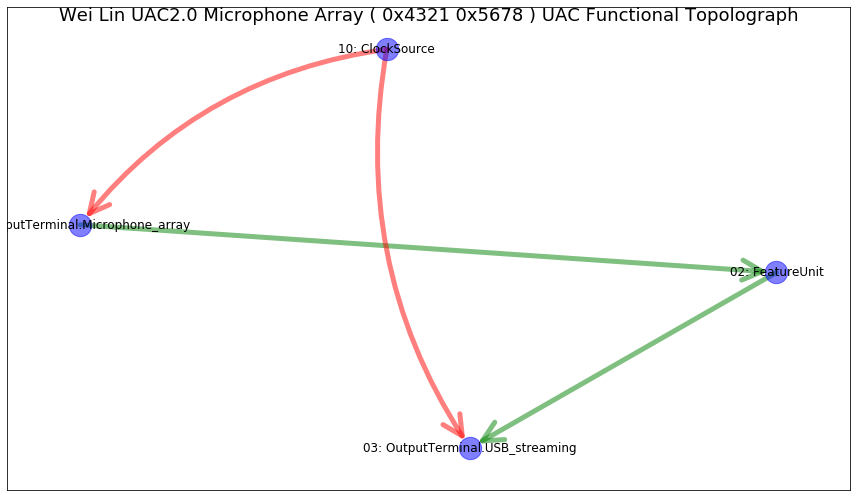

In [7]:
def scan_and_profile(to_dir = None, 
                     topology_file_subfix = ' functional topology.png',
                     descriptors_file_subfix = ' descriptors.json'): 
    
    to_dir = to_dir or os.sep.join([os.getcwd(), 'devices'])
    
    device_ids = find_all_devices_by_class(DEVICE_CLASS.Audio)[1]
    
    for device_id in device_ids:
        dev = get_device(*device_id)
        
        descriptors_filename = os.sep.join([to_dir, dev.manufacturer_product + descriptors_file_subfix])
        dev.dump_descriptors(descriptors_filename)        
        
        topology_filename = os.sep.join([to_dir, dev.manufacturer_product + topology_file_subfix]) 
        title = '{} {}'.format(dev.manufacturer_product,'UAC Functional Topolograph')        
        fig = plt.figure(figsize = (12, 7)) 
        fig.suptitle(title, fontsize = 18)    
        dev.draw_topolograph(node_size = 500, label_font_size = 12, edge_width = 5, edge_arrowstyle = '->', edge_arrowsize = 50)
        plt.tight_layout()
        plt.savefig(topology_filename)
        plt.show() 
        
scan_and_profile()